In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
import requests
from PIL import Image
from io import BytesIO

In [ ]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


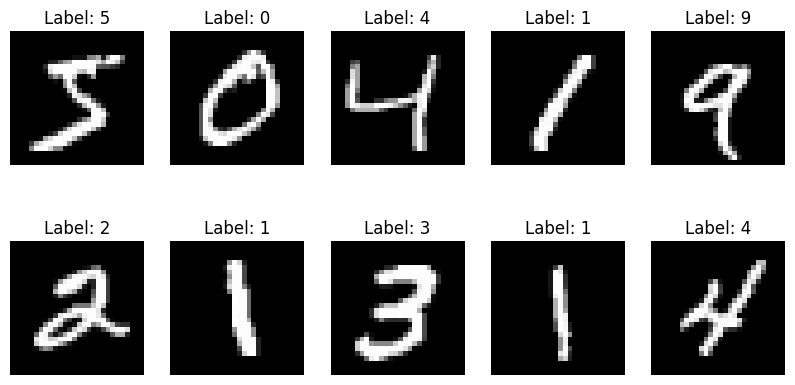

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

In [ ]:
# Shape of the dataset
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Size of the dataset (total elements)
print("Training data size:", X_train.size)
print("Testing data size:", X_test.size)

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Training data size: 47040000
Testing data size: 7840000


✅ Understanding X_train, X_test, Y_train, and Y_test
These variables are used for training and evaluating machine learning models.

Variable	Purpose
X_train	Training input data (features used to train the model)
Y_train	Training labels (correct output for the training data)
X_test	Testing input data (features used to evaluate the model)
Y_test	Testing labels (correct output for the testing data)


In [ ]:
# Normalize pixel values (0-255 → 0-1)
print("before normalization X_train range:", X_train.min(), "to", X_train.max())
X_train, X_test = X_train / 255.0, X_test / 255.0

print("Normalized X_train range:", X_train.min(), "to", X_train.max())

before normalization X_train range: 0 to 255
Normalized X_train range: 0.0 to 1.0


 Why is Reshaping Necessary for CNNs?
CNNs Expect 3D Inputs

Convolutional layers require input with (height, width, channels) format.
If we don't reshape, CNNs may not recognize the input correctly.
Consistency with Colored (RGB) Images

RGB images have 3 channels → Shape: (height, width, 3).
Grayscale images have 1 channel → Shape: (height, width, 1).
CNNs expect a consistent input format, even for grayscale.
TensorFlow’s Default Input Format

Many CNN models expect 4D input: (batch_size, height, width, channels).
-1 in reshape(-1, 28, 28, 1) automatically sets batch size.
✅ Key Takeaways
✔ Reshaping to (28, 28, 1) ensures images have the correct format for CNNs.
✔ CNNs need 3D inputs: (height, width, channels).
✔ Grayscale images have 1 channel (1), while RGB images have 3 (3).



In [ ]:
print("Before Reshaping:", X_train.shape)
# Output: (60000, 28, 28) -> Only height & width, no channel

# Reshape for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("After Reshaping:", X_train.shape)

Before Reshaping: (60000, 28, 28)
After Reshaping: (60000, 28, 28, 1)


✅ Summary
✔ (-1, 28, 28, 1) ensures images are in the correct format for CNNs.
✔ Batch Size (-1): Automatically set based on dataset size.
✔ Height (28) & Width (28): Image dimensions.
✔ Channels (1): Needed for grayscale images; RGB images use 3.

**building model**

In [ ]:
model = keras.Sequential([
    # Convolutional Layer 1
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),

    # Convolutional Layer 2
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    # Flatten Layer (Converts 2D to 1D)
    keras.layers.Flatten(),

    # Fully Connected Layer
    keras.layers.Dense(128, activation='relu'),

    # Output Layer (10 classes for digits 0-9)
    keras.layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Conv2D(32, (3,3), activation='relu')	Extracts 32 features from image using 3×3 filter

MaxPooling2D(2,2)	Reduces size, keeps important features

Conv2D(64, (3,3), activation='relu')	Learns more complex patterns

MaxPooling2D(2,2)	Further reduces size

Flatten()	Converts 2D feature maps into 1D

Dense(128, activation='relu')	Fully connected layer for learning

Dense(10, activation='softmax')	Output layer, 10 neurons for 10 digit classes


Activation	Purpose	Where Used?	Why?
ReLU (relu)	Removes negative values	||Conv & Dense layers||	Helps CNN learn better
Softmax (softmax)	||Converts output into probabilities||	Output layer	Used in multi-class classification

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - accuracy: 0.9088 - loss: 0.2962 - val_accuracy: 0.9849 - val_loss: 0.0457
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9863 - loss: 0.0436 - val_accuracy: 0.9894 - val_loss: 0.0293
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9921 - loss: 0.0275 - val_accuracy: 0.9879 - val_loss: 0.0391
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9925 - loss: 0.0207 - val_accuracy: 0.9896 - val_loss: 0.0347
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9951 - loss: 0.0140 - val_accuracy: 0.9916 - val_loss: 0.0307


In [ ]:
# model evaluation

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9875 - loss: 0.0424
Test accuracy: 99.16%


10000/32=313 computing in batches

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


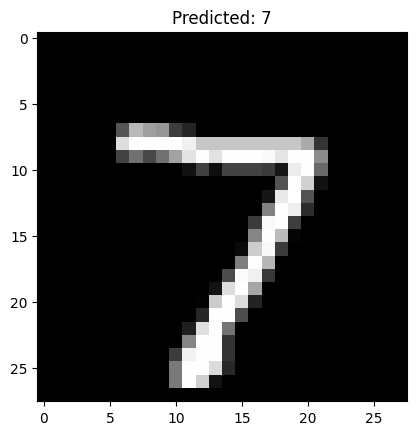

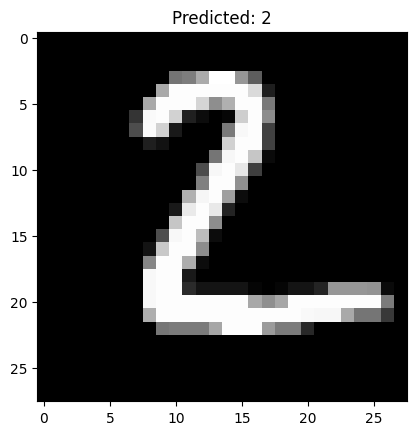

In [ ]:
predictions = model.predict(X_test)
for index in range(0,2):
# Display a test image and predicted label
 # Change index to see different images
  plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
  plt.title(f"Predicted: {np.argmax(predictions[index])}")
  plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


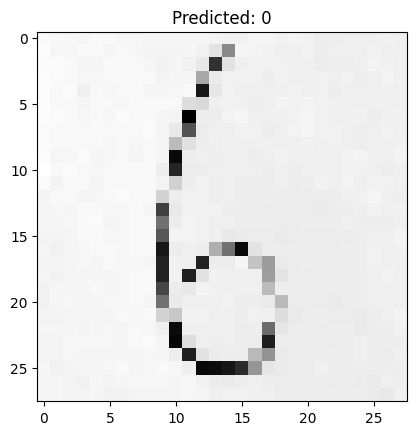

In [ ]:
image_path = r"/content/images.jpg"# Replace with your image file name
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded correctly
if image is None:
    print("❌ Error: Image not found. Check the file path.")
else:
    # Resize image to 28x28 (same as MNIST dataset)
    image = cv2.resize(image, (28, 28))

    # Normalize pixel values (convert from 0-255 to 0-1)
    image = image / 255.0

    # Reshape for model input (batch_size=1, height=28, width=28, channels=1)
    image = image.reshape(1, 28, 28, 1)

    # Predict digit
    prediction = model.predict(image)
    predicted_digit = np.argmax(prediction)

    # Display the image and prediction
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_digit}")
    plt.show()
